# Exploratory Data Analysis (EDA) - Togo (Dapaong QC) Solar Data
#
# **Objective:** Profile, clean, and explore Togo's (Dapaong QC) solar dataset to understand its characteristics, identify trends, and extract insights for potential solar investments.
#
# **Business Objective Context:** MoonLight Energy Solutions aims to enhance operational efficiency and sustainability through targeted solar investments. This EDA will help identify high-potential regions by analyzing environmental measurement data.


## 1. Setup and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

DATA_DIR = '../data/'
FILE_NAME = 'togo-dapaong_qc.csv' # <<< TOGO FILE NAME
data_path = os.path.join(DATA_DIR, FILE_NAME)

CLEANED_DATA_DIR = '../data/'
if not os.path.exists(CLEANED_DATA_DIR):
    os.makedirs(CLEANED_DATA_DIR)
cleaned_file_path = os.path.join(CLEANED_DATA_DIR, 'togo-dapaong_qc_clean.csv') # <<< Adjusted cleaned file name

# %%
try:
    df_tg = pd.read_csv(data_path) # Using df_tg for Togo
    print(f"Successfully loaded {data_path}")
except FileNotFoundError:
    print(f"Error: {data_path} not found. Ensure the file is in the '{DATA_DIR}' directory.")
    df_tg = None
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    df_tg = None


Successfully loaded ../data/togo-dapaong_qc.csv


 ## 2. Initial Data Inspection

In [2]:

if df_tg is not None:
    print("--- First 5 Rows (Togo - Dapaong QC) ---")
    display(df_tg.head())

    print("\n--- Last 5 Rows (Togo - Dapaong QC) ---")
    display(df_tg.tail())

    print("\n--- Data Info (Togo - Dapaong QC) ---")
    df_tg.info()

    print(f"\n--- Data Shape (Togo - Dapaong QC) ---")
    print(f"Rows: {df_tg.shape[0]}, Columns: {df_tg.shape[1]}")

    print("\n--- Data Types (Togo - Dapaong QC) ---")
    display(df_tg.dtypes)
else:
    print("DataFrame for Togo not loaded. Skipping initial inspection.")


--- First 5 Rows (Togo - Dapaong QC) ---


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN


--- Last 5 Rows (Togo - Dapaong QC) ---


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev   WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
525596      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
525597      0.0  0.0      0.0  977         0            0.0   24.2   23.9   
525598      0.0  0.0      0.0  977         0            0.0   24.1   23.8   
525599      0.0  0.0      0.0  977         0            0.0   24.1   23.8   

        Comments  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN


--- Data Info (Togo - Dapaong QC) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  flo

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

### 2.1. Timestamp Conversion

In [3]:
if df_tg is not None:
    if 'Timestamp' in df_tg.columns:
        try:
            df_tg['Timestamp'] = pd.to_datetime(df_tg['Timestamp'])
            print("Timestamp column successfully converted to datetime for Togo.")
            display(df_tg[['Timestamp']].head(2))
            display(df_tg[['Timestamp']].dtypes)
        except Exception as e:
            print(f"Error converting Timestamp column for Togo: {e}")
    else:
        print("Error: 'Timestamp' column not found in Togo data.")
else:
    print("DataFrame for Togo not loaded. Skipping timestamp conversion.")

Timestamp column successfully converted to datetime for Togo.


Timestamp
0 2021-10-25 00:01:00
1 2021-10-25 00:02:00

Timestamp    datetime64[ns]
dtype: object

 ## 3. Summary Statistics & Missing Value Report

In [4]:
if df_tg is not None:
    print("--- Summary Statistics (Numeric Columns - Togo) ---")
    numeric_cols_tg = df_tg.select_dtypes(include=np.number).columns
    if not numeric_cols_tg.empty:
        display(df_tg[numeric_cols_tg].describe().T)
    else:
        print("No numeric columns found for summary statistics in Togo data.")

    print("\n--- Missing Value Report (Counts & Percentage - Togo) ---")
    missing_report_tg = df_tg.isna().sum()
    missing_percentage_tg = (missing_report_tg / len(df_tg)) * 100
    missing_df_tg = pd.DataFrame({'Missing Count': missing_report_tg, 'Missing Percentage': missing_percentage_tg})
    missing_df_tg = missing_df_tg[missing_df_tg['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

    if not missing_df_tg.empty:
        display(missing_df_tg)
    else:
        print("No missing values found in Togo data.")

    print("\n--- Columns with >5% Missing Values (Togo) ---")
    high_missing_cols_tg = missing_df_tg[missing_df_tg['Missing Percentage'] > 5]
    if not high_missing_cols_tg.empty:
        display(high_missing_cols_tg)
    else:
        print("No columns with >5% missing values in Togo data.")
else:
    print("DataFrame for Togo not loaded. Skipping summary statistics and missing values.")

--- Summary Statistics (Numeric Columns - Togo) ---


count        mean         std    min    25%    50%      75%  \
GHI            525600.0  230.555040  322.532347  -12.7   -2.2    2.1  442.400   
DNI            525600.0  151.258469  250.956962    0.0    0.0    0.0  246.400   
DHI            525600.0  116.444352  156.520714    0.0    0.0    2.5  215.700   
ModA           525600.0  226.144375  317.346938    0.0    0.0    4.4  422.525   
ModB           525600.0  219.568588  307.932510    0.0    0.0    4.3  411.000   
Tamb           525600.0   27.751788    4.758023   14.9   24.2   27.2   31.100   
RH             525600.0   55.013160   28.778732    3.3   26.5   59.3   80.800   
WS             525600.0    2.368093    1.462668    0.0    1.4    2.2    3.200   
WSgust         525600.0    3.229490    1.882565    0.0    1.9    2.9    4.400   
WSstdev        525600.0    0.557740    0.268923    0.0    0.4    0.5    0.700   
WD             525600.0  161.741845   91.877217    0.0   74.8  199.1  233.500   
WDstdev        525600.0   10.559568    5.915490    0.0    6.9   10.8   14.100   
BP             525600.0  975.915242    2.153977  968.0  975.0  976.0  977.000   
Cleaning       525600.0    0.000535    0.023116    0.0    0.0    0.0    0.000   
Precipitation  525600.0    0.001382    0.026350    0.0    0.0    0.0    0.000   
TModA          525600.0   32.444403   10.998334   13.1   23.9   28.4   40.600   
TModB          525600.0   33.543330   12.769277   13.1   23.6   28.4   43.000   
Comments            0.0         NaN         NaN    NaN    NaN    NaN      NaN   

                  max  
GHI            1424.0  
DNI            1004.5  
DHI             805.7  
ModA           1380.0  
ModB           1367.0  
Tamb             41.4  
RH               99.8  
WS               16.1  
WSgust           23.1  
WSstdev           4.7  
WD              360.0  
WDstdev          86.9  
BP              983.0  
Cleaning          1.0  
Precipitation     2.3  
TModA            70.4  
TModB            94.6  
Comments          NaN


--- Missing Value Report (Counts & Percentage - Togo) ---


Missing Count  Missing Percentage
Comments         525600               100.0


--- Columns with >5% Missing Values (Togo) ---


Missing Count  Missing Percentage
Comments         525600               100.0

### 3.1. Plan for Handling Missing Values (Togo)

In [5]:
if df_tg is not None:
    df_cleaned_tg = df_tg.copy()

    if 'Comments' in df_cleaned_tg.columns:
        comments_nan_or_empty_tg = df_cleaned_tg['Comments'].isna().sum() + (df_cleaned_tg['Comments'] == '').sum()
        if comments_nan_or_empty_tg / len(df_cleaned_tg) > 0.9:
            print("Dropping 'Comments' column for Togo as it is mostly empty/NaN.")
            df_cleaned_tg.drop('Comments', axis=1, inplace=True)
        else:
            print("Keeping 'Comments' column for Togo.") # Potentially inspect unique values if kept

    potential_numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
                              'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 
                              'Precipitation', 'TModA', 'TModB']
    
    cols_to_impute_median_tg = [col for col in potential_numeric_cols if col in df_cleaned_tg.columns and df_cleaned_tg[col].isna().any()]

    print("\n--- Imputing Missing Values (Median - Togo) ---")
    for col in cols_to_impute_median_tg:
        if pd.api.types.is_numeric_dtype(df_cleaned_tg[col]):
            median_val = df_cleaned_tg[col].median()
            df_cleaned_tg[col].fillna(median_val, inplace=True)
            print(f"Imputed missing values in '{col}' (Togo) with median ({median_val:.2f}).")
        else:
             print(f"Column '{col}' (Togo) is not numeric, skipping median imputation.")

    if 'Cleaning' in df_cleaned_tg.columns and df_cleaned_tg['Cleaning'].isna().any():
        mode_cleaning_tg = df_cleaned_tg['Cleaning'].mode()[0]
        df_cleaned_tg['Cleaning'].fillna(mode_cleaning_tg, inplace=True)
        print(f"Imputed missing values in 'Cleaning' (Togo) with mode ({mode_cleaning_tg}).")

    print("\n--- Missing Values After Imputation (Togo) ---")
    remaining_missing_tg = df_cleaned_tg.isna().sum()
    display(remaining_missing_tg[remaining_missing_tg > 0])
    if remaining_missing_tg.sum() == 0:
        print("All identified missing values handled for Togo.")
else:
    print("DataFrame for Togo not loaded. Skipping missing value handling.")

Dropping 'Comments' column for Togo as it is mostly empty/NaN.

--- Imputing Missing Values (Median - Togo) ---

--- Missing Values After Imputation (Togo) ---


Series([], dtype: int64)

All identified missing values handled for Togo.


## 4. Outlier Detection & Basic Cleaning (Togo)
### 4.1. Z-score for Outlier Detection


In [6]:
if 'df_cleaned_tg' in locals() and df_cleaned_tg is not None:
    cols_for_zscore_tg = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    
    print("--- Outlier Detection (Z-score > 3 - Togo) ---")
    for col in cols_for_zscore_tg:
        if col in df_cleaned_tg.columns and pd.api.types.is_numeric_dtype(df_cleaned_tg[col]):
            if df_cleaned_tg[col].isna().any():
                 print(f"Warning: Column '{col}' (Togo) still contains NaNs before Z-score.")
            col_zscore_tg = zscore(df_cleaned_tg[col].dropna())
            zscore_series_tg = pd.Series(col_zscore_tg, index=df_cleaned_tg[col].dropna().index)
            df_cleaned_tg[f'{col}_zscore'] = zscore_series_tg
            
            is_outlier_tg = np.abs(df_cleaned_tg[f'{col}_zscore']) > 3
            if is_outlier_tg.any():
                print(f"Potential outliers found in '{col}' (Togo): {is_outlier_tg.sum()} instances.")
            else:
                print(f"No outliers (Z-score > 3) found in '{col}' (Togo).")
        else:
            print(f"Column '{col}' (Togo) not found or not numeric. Skipping Z-score.")
else:
    print("Cleaned DataFrame for Togo not available. Skipping outlier detection.")


--- Outlier Detection (Z-score > 3 - Togo) ---
Potential outliers found in 'GHI' (Togo): 305 instances.
Potential outliers found in 'DNI' (Togo): 1062 instances.
Potential outliers found in 'DHI' (Togo): 3415 instances.
Potential outliers found in 'ModA' (Togo): 137 instances.
Potential outliers found in 'ModB' (Togo): 206 instances.
Potential outliers found in 'WS' (Togo): 3510 instances.
Potential outliers found in 'WSgust' (Togo): 3915 instances.


### 4.2. Plan for Handling Outliers & Physical Constraints (Togo)

In [7]:
if 'df_cleaned_tg' in locals() and df_cleaned_tg is not None:
    print("\n--- Applying Basic Physical Constraint Cleaning (Togo) ---")
    
    for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
        if col in df_cleaned_tg.columns:
            original_negative_count = (df_cleaned_tg[col] < 0).sum()
            original_high_count = (df_cleaned_tg[col] > 1500).sum()
            df_cleaned_tg[col] = df_cleaned_tg[col].clip(lower=0, upper=1500)
            if original_negative_count > 0: print(f"Clipped {original_negative_count} negative values in '{col}' (TG) to 0.")
            if original_high_count > 0: print(f"Clipped {original_high_count} values > 1500 in '{col}' (TG) to 1500.")

    if 'WS' in df_cleaned_tg.columns and 'WSgust' in df_cleaned_tg.columns:
        inconsistent_ws_mask_tg = df_cleaned_tg['WSgust'] < df_cleaned_tg['WS']
        if inconsistent_ws_mask_tg.any():
            print(f"Correcting {inconsistent_ws_mask_tg.sum()} instances in TG where WSgust < WS.")
            df_cleaned_tg.loc[inconsistent_ws_mask_tg, 'WSgust'] = df_cleaned_tg.loc[inconsistent_ws_mask_tg, 'WS']
            
    if 'RH' in df_cleaned_tg.columns:
        original_rh_out_of_bounds_tg = ((df_cleaned_tg['RH'] < 0) | (df_cleaned_tg['RH'] > 100)).sum()
        if original_rh_out_of_bounds_tg > 0:
            df_cleaned_tg['RH'] = df_cleaned_tg['RH'].clip(lower=0, upper=100)
            print(f"Clipped {original_rh_out_of_bounds_tg} RH values (TG) to be within [0, 100].")
            
    if 'Precipitation' in df_cleaned_tg.columns:
        original_precip_negative_tg = (df_cleaned_tg['Precipitation'] < 0).sum()
        if original_precip_negative_tg > 0:
            df_cleaned_tg['Precipitation'] = df_cleaned_tg['Precipitation'].clip(lower=0)
            print(f"Clipped {original_precip_negative_tg} negative Precipitation values (TG) to 0.")
else:
    print("Cleaned DataFrame for Togo not available. Skipping constraint cleaning.")


--- Applying Basic Physical Constraint Cleaning (Togo) ---
Clipped 257385 negative values in 'GHI' (TG) to 0.


## 5. Export Cleaned Data (Togo)


In [8]:
if 'df_cleaned_tg' in locals() and df_cleaned_tg is not None:
    try:
        z_score_cols_to_drop_tg = [col for col in df_cleaned_tg.columns if '_zscore' in col]
        df_to_export_tg = df_cleaned_tg.drop(columns=z_score_cols_to_drop_tg, errors='ignore')
        df_to_export_tg.to_csv(cleaned_file_path, index=False)
        print(f"Cleaned Togo data exported to: {cleaned_file_path}")
    except Exception as e:
        print(f"Error exporting cleaned Togo data: {e}")
else:
    print("Cleaned DataFrame for Togo not available. Skipping export.")

Cleaned Togo data exported to: ../data/togo-dapaong_qc_clean.csv


## 6. Exploratory Data Analysis (EDA - Togo)

In [9]:
if 'df_cleaned_tg' in locals() and df_cleaned_tg is not None and 'Timestamp' in df_cleaned_tg.columns:
    if pd.api.types.is_datetime64_any_dtype(df_cleaned_tg['Timestamp']):
        df_plot_tg = df_cleaned_tg.set_index('Timestamp').copy()
        print("Set 'Timestamp' as index for plotting Togo data.")
    else:
        print("Warning: 'Timestamp' column (Togo) is not datetime.")
        df_plot_tg = df_cleaned_tg.copy()
elif 'df_cleaned_tg' in locals() and df_cleaned_tg is not None:
    print("Warning: 'Timestamp' column not found in df_cleaned_tg.")
    df_plot_tg = df_cleaned_tg.copy()
else:
    print("Cleaned DataFrame for Togo ('df_cleaned_tg') not available. Skipping EDA setup.")
    df_plot_tg = None

Set 'Timestamp' as index for plotting Togo data.


 ### 6.1. Time Series Analysis (Togo)

--- Time Series Plots (Togo - Dapaong QC) ---


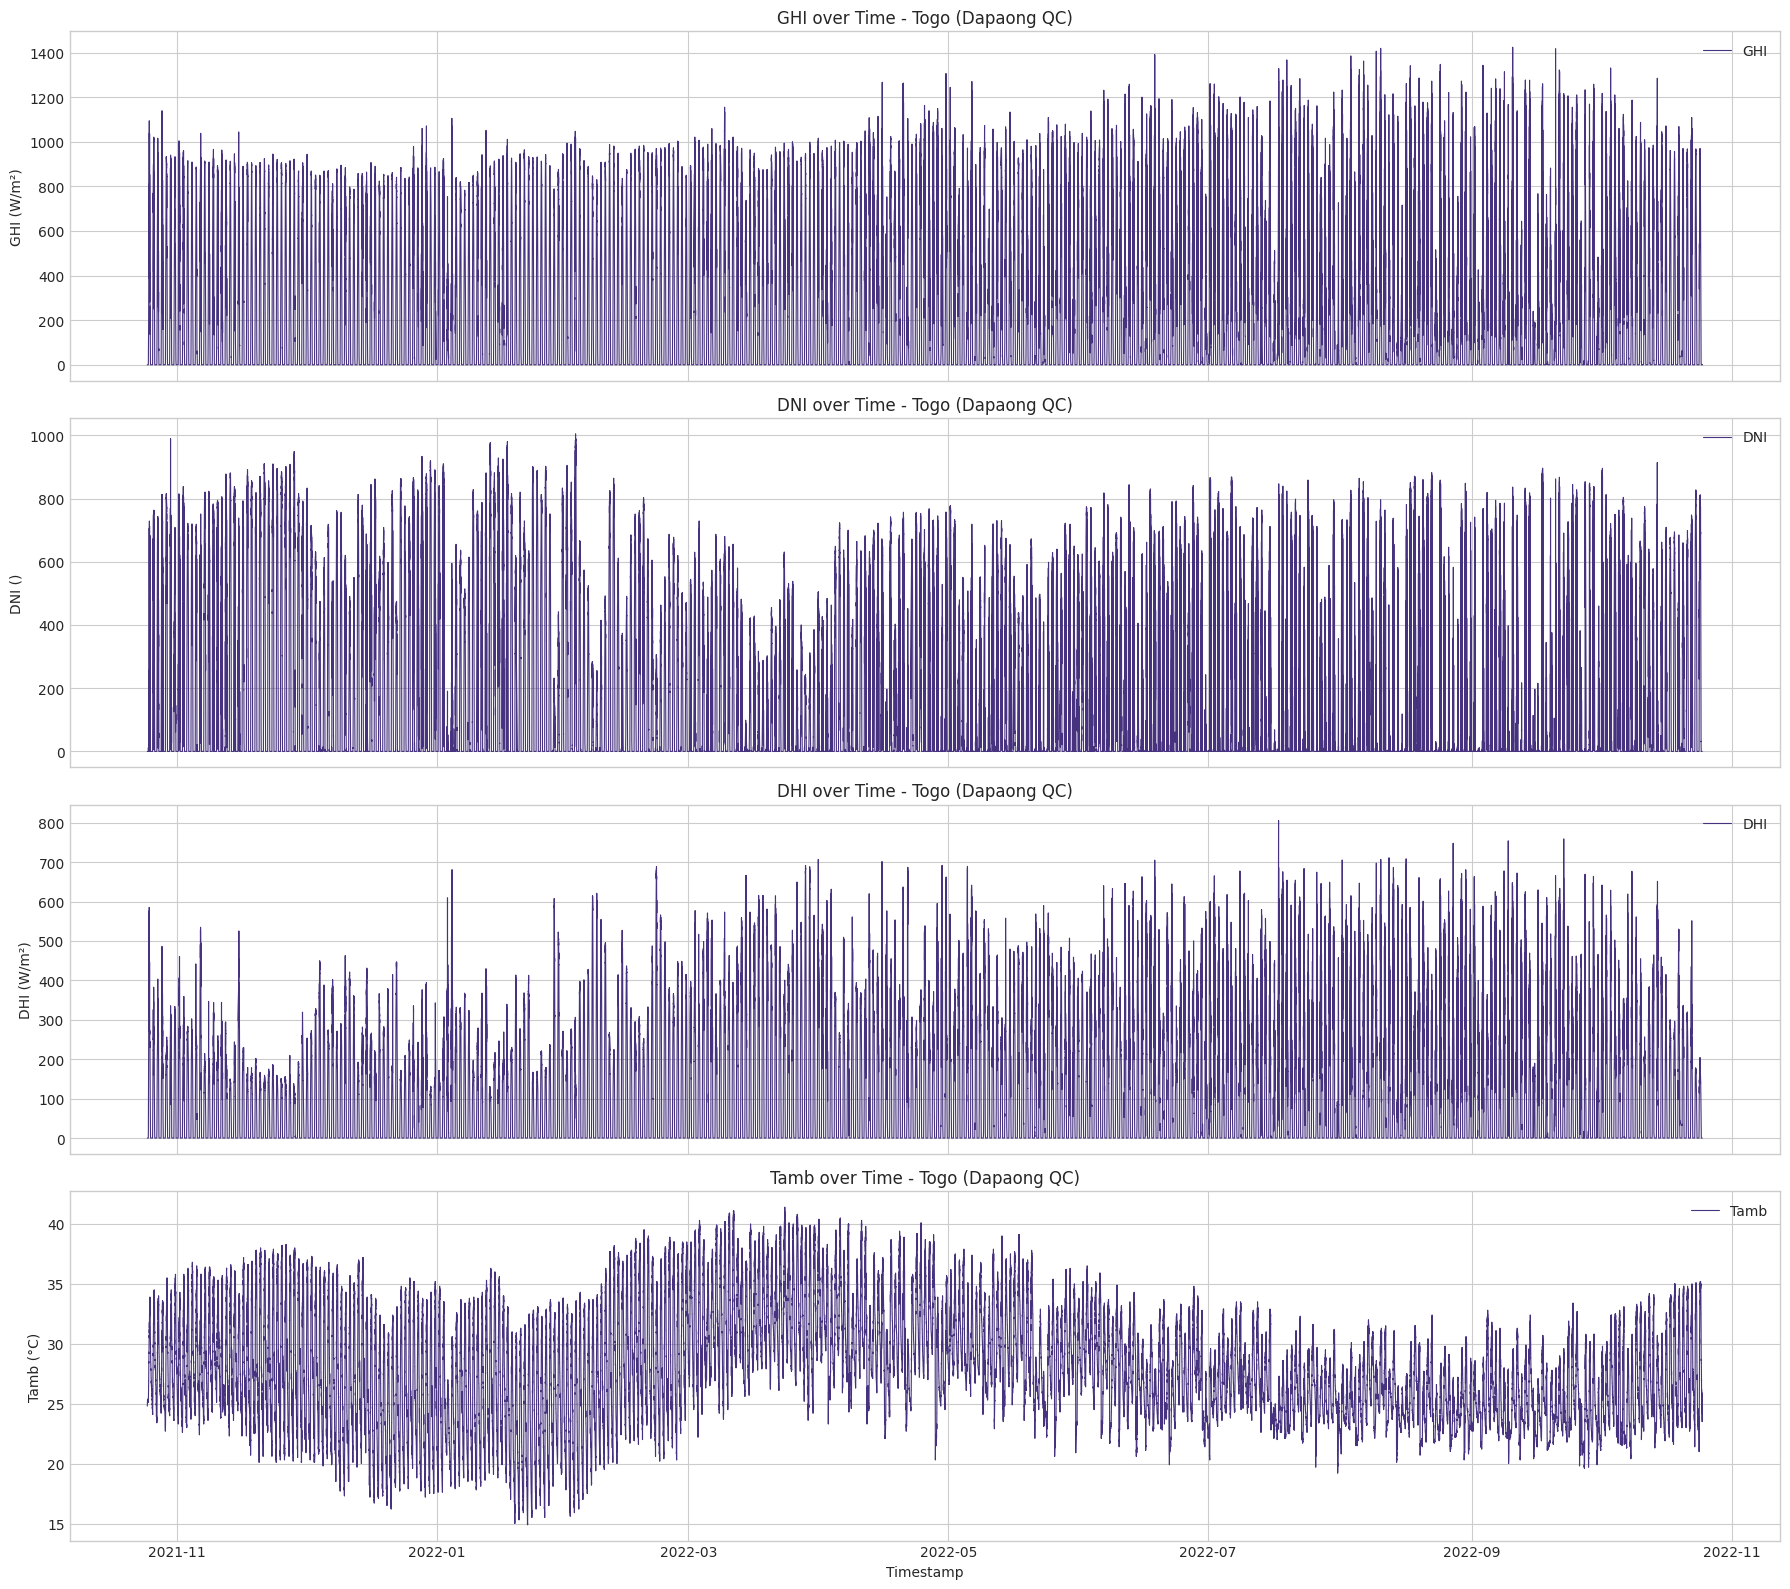


--- Average GHI by Month (Togo - Dapaong QC) ---


/tmp/ipykernel_74264/1931898983.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_ghi_tg = df_plot_tg['GHI'].resample('M').mean()


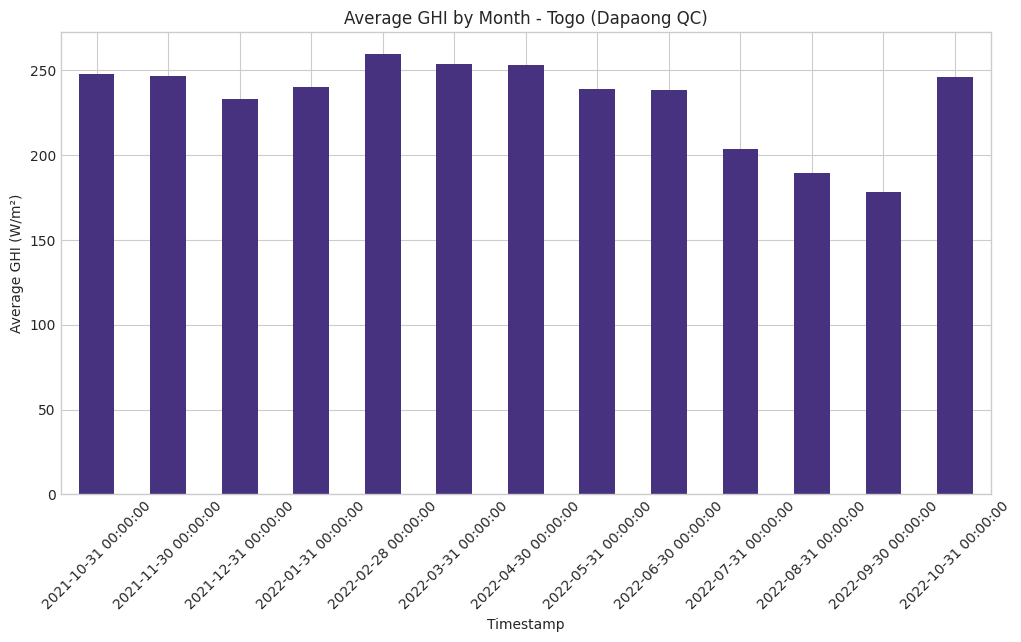


--- Average GHI by Hour of Day (Togo - Dapaong QC) ---


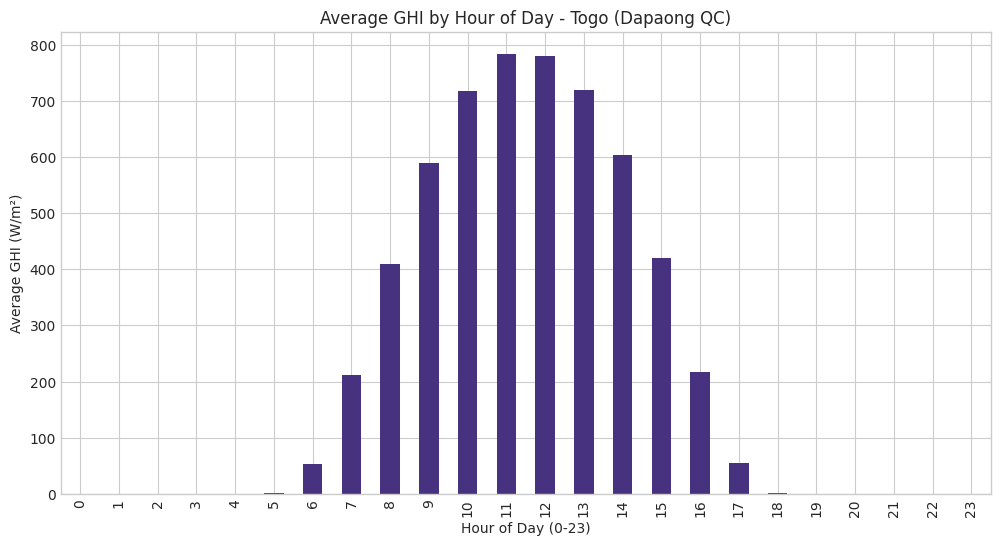

In [10]:
if df_plot_tg is not None and isinstance(df_plot_tg.index, pd.DatetimeIndex):
    print("--- Time Series Plots (Togo - Dapaong QC) ---")
    cols_to_plot_ts_tg = ['GHI', 'DNI', 'DHI', 'Tamb']
    valid_cols_ts_tg = [col for col in cols_to_plot_ts_tg if col in df_plot_tg.columns]
    
    if valid_cols_ts_tg:
        num_plots = len(valid_cols_ts_tg)
        fig, axes = plt.subplots(num_plots, 1, figsize=(18, 4 * num_plots), sharex=True)
        if num_plots == 1: axes = [axes]
        for i, col in enumerate(valid_cols_ts_tg):
            sns.lineplot(data=df_plot_tg, x=df_plot_tg.index, y=col, ax=axes[i], label=col, errorbar=None, linewidth=0.8)
            axes[i].set_ylabel(f"{col} ({'W/m²' if 'HI' in col else '°C' if 'Tamb' in col else ''})")
            axes[i].set_title(f"{col} over Time - Togo (Dapaong QC)")
            axes[i].legend()
        plt.xlabel("Timestamp")
        plt.tight_layout()
        plt.show()
    else:
        print(f"None of the specified columns for time series plotting ({cols_to_plot_ts_tg}) are available in Togo data.")

    if 'GHI' in df_plot_tg.columns and df_plot_tg.index.month.nunique() > 1:
        print("\n--- Average GHI by Month (Togo - Dapaong QC) ---")
        monthly_avg_ghi_tg = df_plot_tg['GHI'].resample('M').mean()
        if not monthly_avg_ghi_tg.empty:
            monthly_avg_ghi_tg.plot(kind='bar', figsize=(12, 6))
            plt.title("Average GHI by Month - Togo (Dapaong QC)")
            plt.ylabel("Average GHI (W/m²)")
            plt.xticks(rotation=45)
            plt.show()
    
    if 'GHI' in df_plot_tg.columns:
        print("\n--- Average GHI by Hour of Day (Togo - Dapaong QC) ---")
        hourly_avg_ghi_tg = df_plot_tg.groupby(df_plot_tg.index.hour)['GHI'].mean()
        if not hourly_avg_ghi_tg.empty:
            hourly_avg_ghi_tg.plot(kind='bar', figsize=(12, 6))
            plt.title("Average GHI by Hour of Day - Togo (Dapaong QC)")
            plt.xlabel("Hour of Day (0-23)")
            plt.ylabel("Average GHI (W/m²)")
            plt.show()
else:
    print("Plotting DataFrame for Togo (df_plot_tg) not available or Timestamp index not set correctly. Skipping Time Series Analysis.")

 ### 6.2. Cleaning Impact (Togo)

--- Average Module Readings by Cleaning Status (Togo - Dapaong QC) ---


ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744

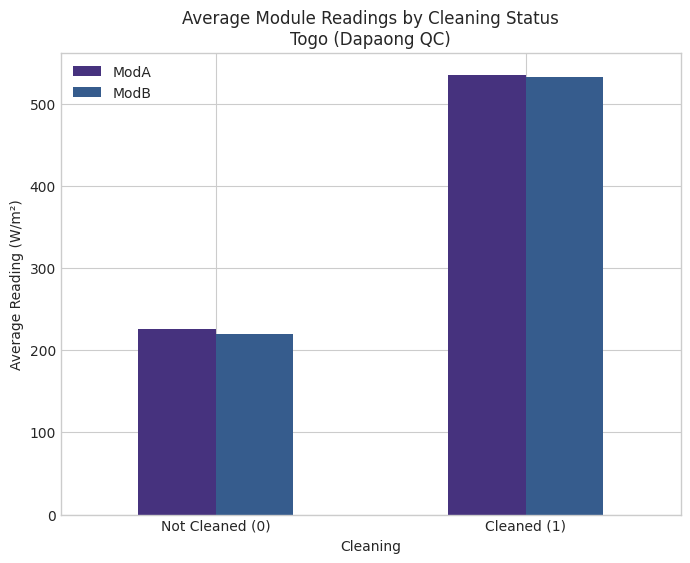

In [11]:
if df_plot_tg is not None and 'Cleaning' in df_plot_tg.columns and 'ModA' in df_plot_tg.columns and 'ModB' in df_plot_tg.columns:
    if df_plot_tg['Cleaning'].nunique() > 1 and df_plot_tg['Cleaning'].notna().all():
        cleaning_impact_tg = df_plot_tg.groupby('Cleaning')[['ModA', 'ModB']].mean()
        print("--- Average Module Readings by Cleaning Status (Togo - Dapaong QC) ---")
        display(cleaning_impact_tg)
        if not cleaning_impact_tg.empty:
            cleaning_impact_tg.plot(kind='bar', figsize=(8, 6))
            plt.title("Average Module Readings by Cleaning Status\nTogo (Dapaong QC)")
            plt.ylabel("Average Reading (W/m²)")
            plt.xticks(ticks=[0, 1], labels=['Not Cleaned (0)', 'Cleaned (1)'], rotation=0)
            plt.show()
    elif df_plot_tg['Cleaning'].nunique() <=1:
         print(f"Not enough distinct 'Cleaning' events (0 and 1) to show impact for Togo. Unique values: {df_plot_tg['Cleaning'].unique()}")
    else:
        print("'Cleaning' column (Togo) might contain NaNs.")
else:
    print("df_plot_tg, 'Cleaning', 'ModA', or 'ModB' column not available for Togo. Skipping Cleaning Impact analysis.")

### 6.3. Correlation & Relationship Analysis (Togo)
#### 6.3.1. Correlation Heatmap

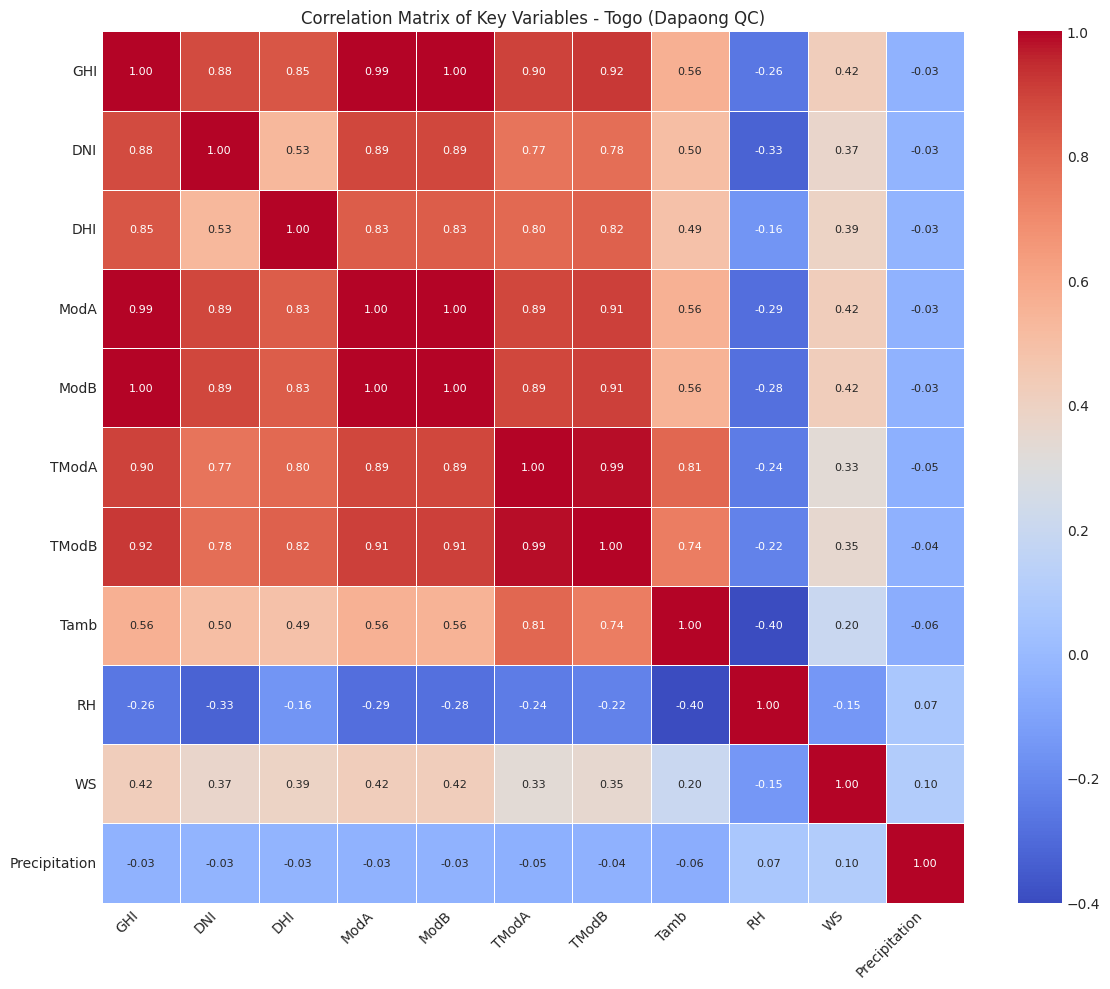

In [12]:
if df_plot_tg is not None:
    correlation_cols_tg = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'Precipitation']
    valid_correlation_cols_tg = [col for col in correlation_cols_tg if col in df_plot_tg.columns and pd.api.types.is_numeric_dtype(df_plot_tg[col])]
    if len(valid_correlation_cols_tg) > 1:
        plt.figure(figsize=(12, 10))
        correlation_matrix_tg = df_plot_tg[valid_correlation_cols_tg].corr()
        sns.heatmap(correlation_matrix_tg, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title("Correlation Matrix of Key Variables - Togo (Dapaong QC)")
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough valid numeric columns for correlation matrix in Togo data. Found: {valid_correlation_cols_tg}")
else:
    print("df_plot_tg not available. Skipping Correlation Heatmap for Togo.")

#### 6.3.2. Scatter Plots (Togo)

--- Scatter Plots (Togo - Dapaong QC) ---


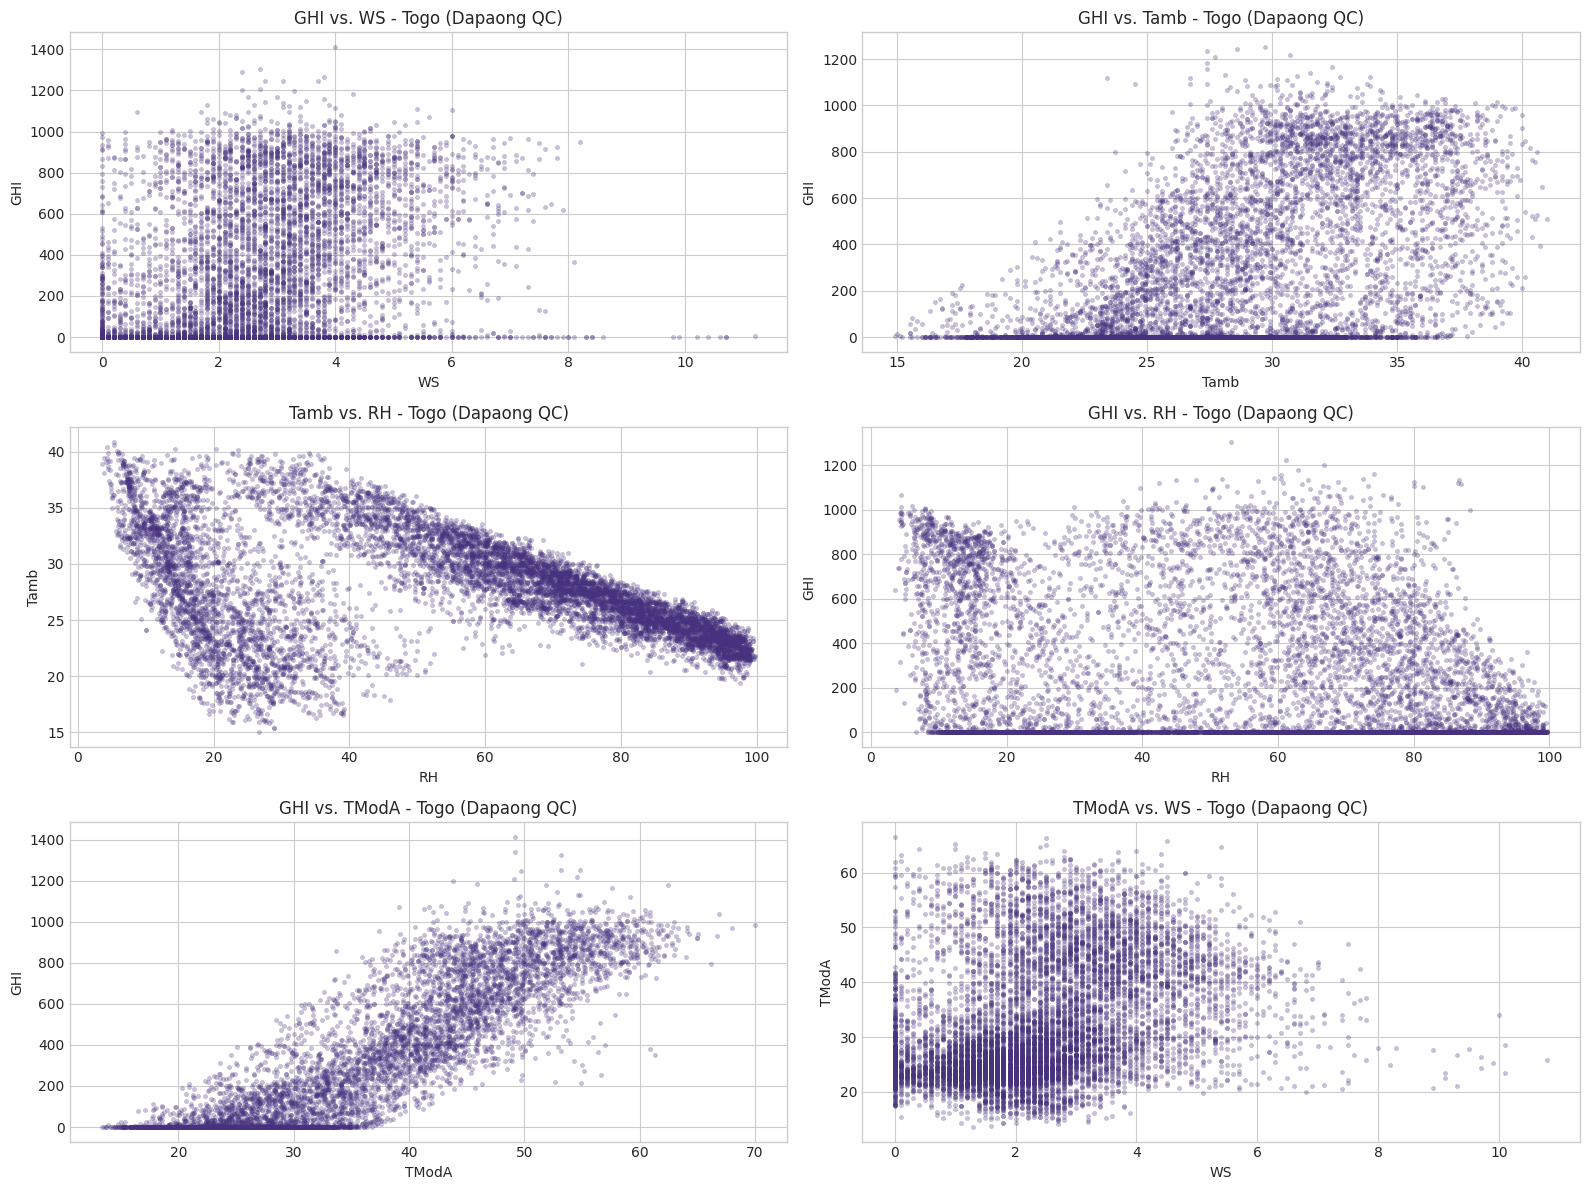

In [13]:
if df_plot_tg is not None:
    print("--- Scatter Plots (Togo - Dapaong QC) ---")
    scatter_pairs_tg = [('WS', 'GHI'), ('Tamb', 'GHI'), ('RH', 'Tamb'), ('RH', 'GHI'), ('TModA', 'GHI'), ('WS', 'TModA')]
    valid_scatter_pairs_tg = []
    for x_col, y_col in scatter_pairs_tg:
        if x_col in df_plot_tg.columns and y_col in df_plot_tg.columns:
            valid_scatter_pairs_tg.append((x_col,y_col))
        else:
            print(f"Skipping scatter plot (TG): Columns for {x_col} vs {y_col} not fully available.")

    if valid_scatter_pairs_tg:
        num_valid_plots = len(valid_scatter_pairs_tg)
        fig, axes = plt.subplots(nrows=(num_valid_plots + 1) // 2, ncols=2, figsize=(16, 4 * ((num_valid_plots + 1) // 2)))
        axes = axes.flatten()
        for i, (x_col, y_col) in enumerate(valid_scatter_pairs_tg):
            sample_df_tg = df_plot_tg if len(df_plot_tg) < 10000 else df_plot_tg.sample(10000)
            sns.scatterplot(data=sample_df_tg, x=x_col, y=y_col, ax=axes[i], alpha=0.3, s=10, edgecolor=None)
            axes[i].set_title(f"{y_col} vs. {x_col} - Togo (Dapaong QC)")
        if num_valid_plots % 2 != 0 and num_valid_plots > 0 :
            if num_valid_plots < len(axes): fig.delaxes(axes[num_valid_plots])
        plt.tight_layout()
        plt.show()
else:
    print("df_plot_tg not available. Skipping Scatter Plots for Togo.")


### 6.4. Wind & Distribution Analysis (Togo)
#### 6.4.1. Wind Rose (WS/WD)

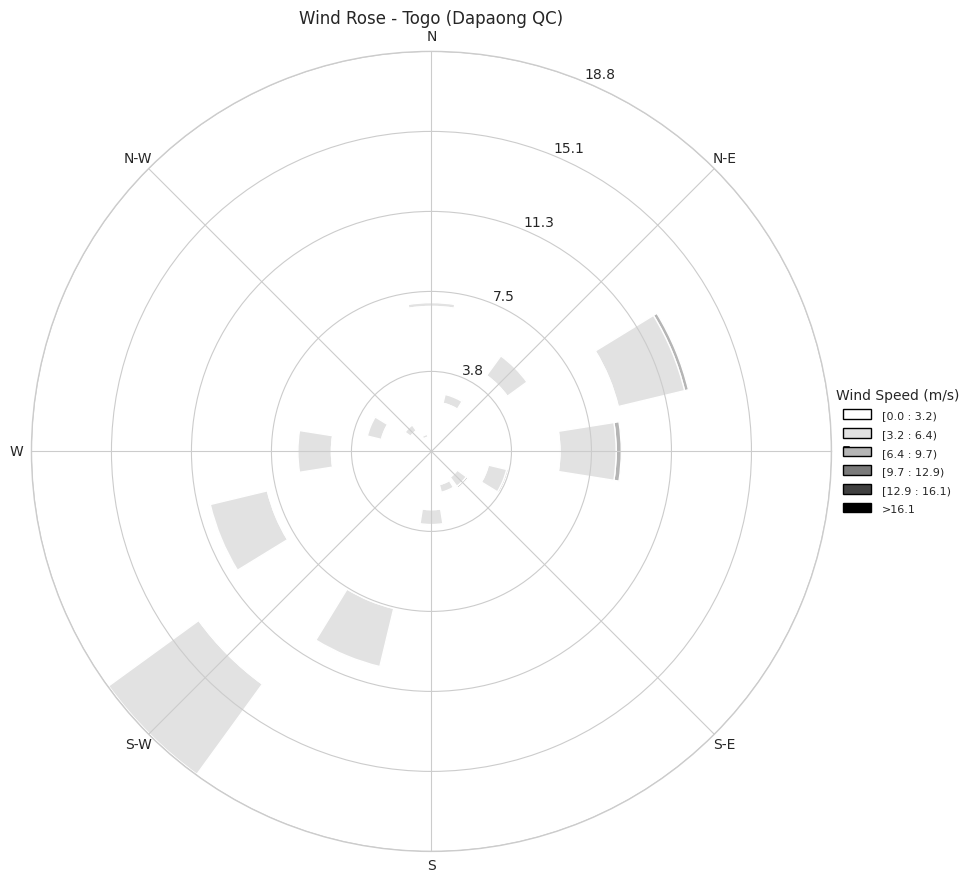

In [14]:
try:
    from windrose import WindroseAxes
except ImportError:
    print("Windrose library not installed. Skipping wind rose plot. Install with: pip install windrose")
    WindroseAxes = None

if df_plot_tg is not None and WindroseAxes is not None:
    if 'WS' in df_plot_tg.columns and 'WD' in df_plot_tg.columns:
        ws_wd_data_tg = df_plot_tg[['WS', 'WD']].dropna()
        if not ws_wd_data_tg.empty and len(ws_wd_data_tg['WD'].unique()) > 1:
            fig = plt.figure(figsize=(10, 10))
            ax = WindroseAxes.from_ax(fig=fig)
            ax.bar(ws_wd_data_tg['WD'], ws_wd_data_tg['WS'], normed=True, opening=0.8, edgecolor='white', nsector=16)
            ax.set_legend(title="Wind Speed (m/s)", loc='center left', bbox_to_anchor=(1, 0.5))
            plt.title("Wind Rose - Togo (Dapaong QC)", pad=20)
            plt.show()
        elif ws_wd_data_tg.empty : print("No valid WS/WD data for Togo wind rose plot.")
        else: print("Not enough variation in Wind Direction for Togo wind rose plot.")
    else: print("WS or WD column not found in Togo data. Skipping wind rose plot.")
elif WindroseAxes is None and df_plot_tg is not None: pass
else: print("df_plot_tg not available. Skipping Wind Rose for Togo.")

#### 6.4.2. Histograms (Togo)

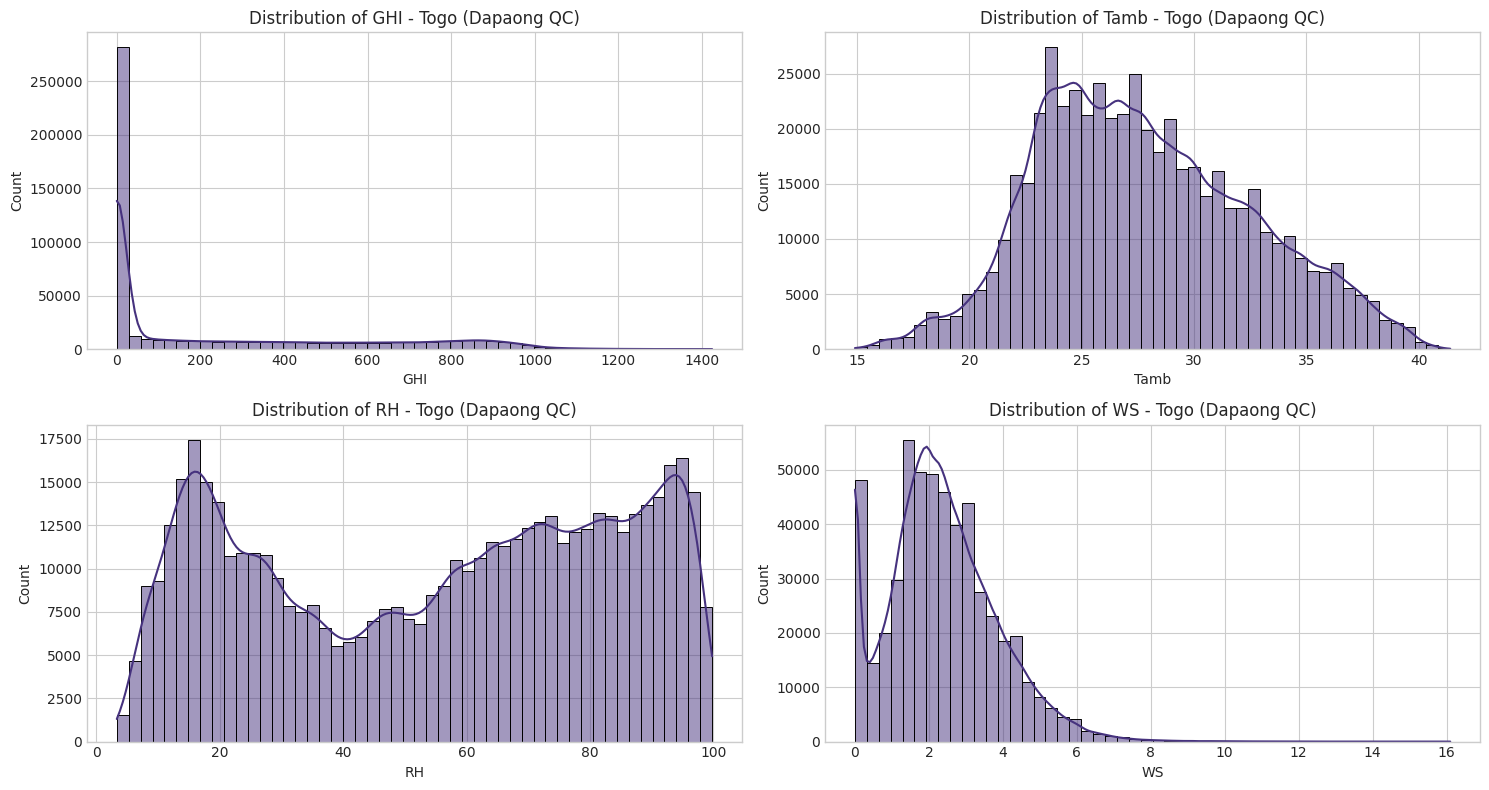

In [15]:
if df_plot_tg is not None:
    hist_cols_tg = ['GHI', 'Tamb', 'RH', 'WS']
    valid_hist_cols_tg = [col for col in hist_cols_tg if col in df_plot_tg.columns]
    if valid_hist_cols_tg:
        num_hist_plots = len(valid_hist_cols_tg)
        fig, axes = plt.subplots( (num_hist_plots + 1)//2, 2, figsize=(15, 4 * ((num_hist_plots + 1)//2) ))
        axes = axes.flatten()
        for i, col in enumerate(valid_hist_cols_tg):
            sns.histplot(df_plot_tg[col], kde=True, ax=axes[i], bins=50)
            axes[i].set_title(f"Distribution of {col} - Togo (Dapaong QC)")
        if num_hist_plots % 2 != 0 and num_hist_plots > 0 :
             if num_hist_plots < len(axes): fig.delaxes(axes[num_hist_plots])
        plt.tight_layout()
        plt.show()
else:
    print("df_plot_tg not available. Skipping Histograms for Togo.")


### 6.5. Temperature Analysis (Togo)

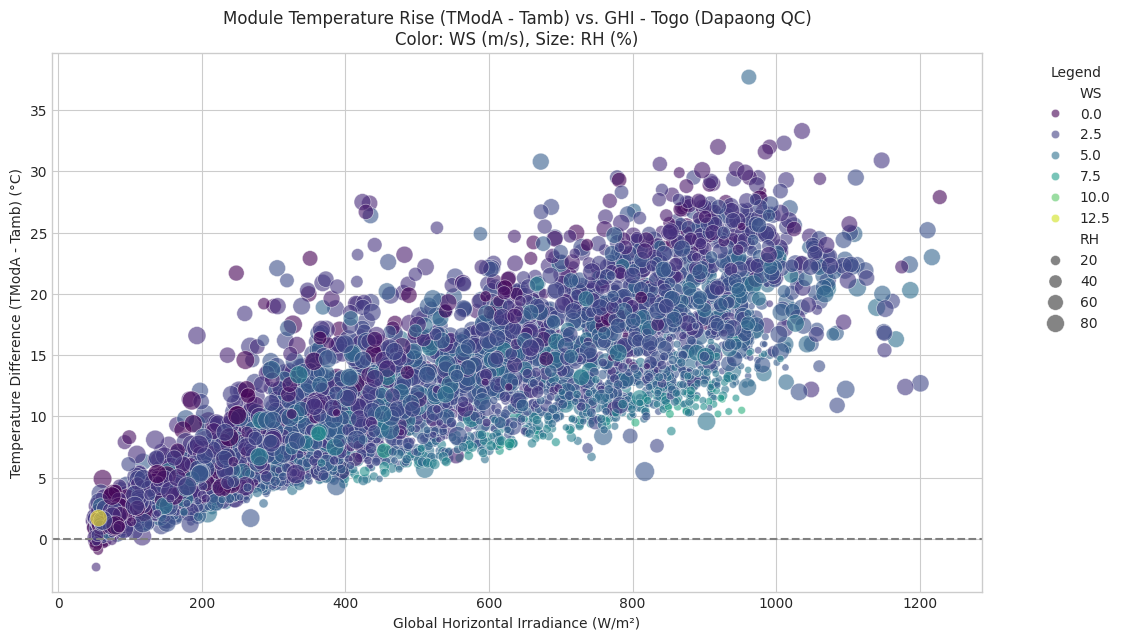

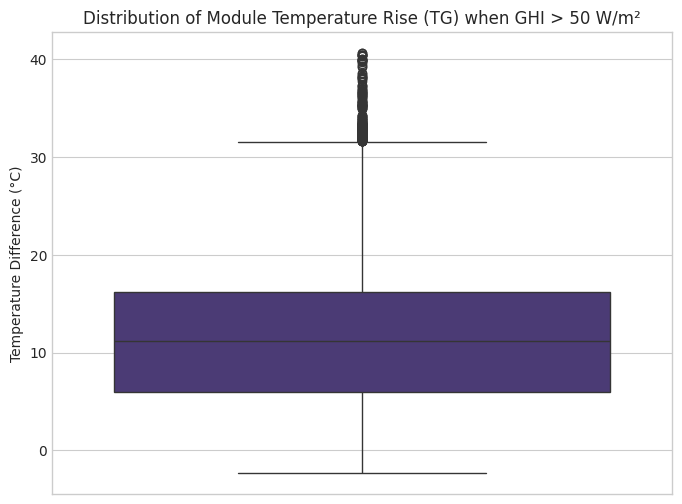


Descriptive statistics for TModA - Tamb (TG, GHI > 50 W/m²):


count    234269.000000
mean         11.568051
std           6.806025
min          -2.300000
25%           6.000000
50%          11.200000
75%          16.200000
max          40.600000
Name: T_Diff_ModA_Amb, dtype: float64

In [16]:
if df_plot_tg is not None and 'TModA' in df_plot_tg.columns and 'Tamb' in df_plot_tg.columns and 'GHI' in df_plot_tg.columns:
    df_plot_tg['T_Diff_ModA_Amb'] = df_plot_tg['TModA'] - df_plot_tg['Tamb']
    plt.figure(figsize=(12, 7))
    sample_df_temp_tg = df_plot_tg if len(df_plot_tg) < 10000 else df_plot_tg.sample(10000)
    sns.scatterplot(data=sample_df_temp_tg[sample_df_temp_tg['GHI'] > 50], 
                    x='GHI', y='T_Diff_ModA_Amb', hue='WS', size='RH', sizes=(20,200),
                    palette='viridis', alpha=0.6)
    plt.title('Module Temperature Rise (TModA - Tamb) vs. GHI - Togo (Dapaong QC)\nColor: WS (m/s), Size: RH (%)')
    plt.xlabel('Global Horizontal Irradiance (W/m²)')
    plt.ylabel('Temperature Difference (TModA - Tamb) (°C)')
    plt.axhline(0, color='grey', linestyle='--'); plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left'); plt.grid(True); plt.show()

    plt.figure(figsize=(8,6))
    sns.boxplot(y=df_plot_tg[df_plot_tg['GHI'] > 50]['T_Diff_ModA_Amb'])
    plt.title('Distribution of Module Temperature Rise (TG) when GHI > 50 W/m²')
    plt.ylabel('Temperature Difference (°C)'); plt.show()
    
    print("\nDescriptive statistics for TModA - Tamb (TG, GHI > 50 W/m²):")
    display(df_plot_tg[df_plot_tg['GHI'] > 50]['T_Diff_ModA_Amb'].describe())
else:
    print("TModA, Tamb, or GHI column not available for detailed temperature analysis in Togo data.")


 ### 6.6. Bubble Chart (Togo)

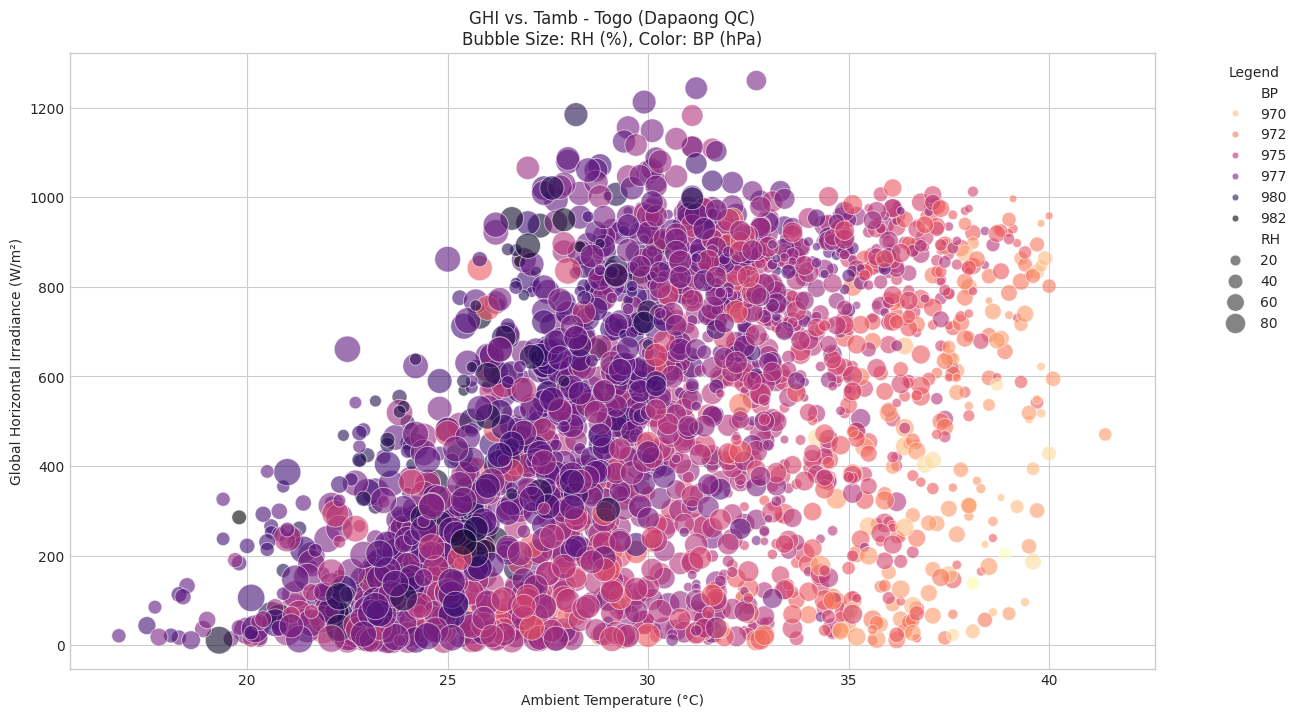

In [17]:
if df_plot_tg is not None:
    bubble_chart_cols_tg = ['GHI', 'Tamb', 'RH', 'BP']
    if all(col in df_plot_tg.columns for col in bubble_chart_cols_tg):
        plt.figure(figsize=(14, 8))
        sample_df_bubble_tg = df_plot_tg if len(df_plot_tg) < 5000 else df_plot_tg.sample(5000)
        sns.scatterplot(data=sample_df_bubble_tg[sample_df_bubble_tg['GHI'] > 10], 
                        x='Tamb', y='GHI', size='RH', hue='BP', sizes=(30, 400), alpha=0.6, palette="magma_r")
        plt.title("GHI vs. Tamb - Togo (Dapaong QC)\nBubble Size: RH (%), Color: BP (hPa)")
        plt.xlabel("Ambient Temperature (°C)"); plt.ylabel("Global Horizontal Irradiance (W/m²)")
        plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=0.8); plt.grid(True); plt.show()
    else:
        missing_bubble_cols_tg = [col for col in bubble_chart_cols_tg if col not in df_plot_tg.columns]
        print(f"One or more columns ({missing_bubble_cols_tg}) not found for Togo bubble chart.")
else:
    print("df_plot_tg not available. Skipping Bubble Chart for Togo.")


In [18]:
print("Togo (Dapaong QC) EDA notebook execution complete.")

Togo (Dapaong QC) EDA notebook execution complete.
